In [1]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from tensorflow.keras.optimizers import SGD, Adam
from google.colab import files

# display results to 3 decimal points, not in scientific notation
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [ ]:
uploaded = files.upload()

# Data Pre-processing
Abbiamo pre-processato i dati andando ad eliminare i primi 2 secondi di dati in quanto abbiamo ritenuto non fossero direttamente collegati all'attivitá di estrazione o riposizionamento del telefono dalla tasca. 
Abbiamo inoltre sostituito la label con un formato numerico, piú adatto alla rete neurale rispetto alla stringa, formato piú human-readable.

In [ ]:
accelerometer = pd.read_csv("SensorData_Acc_0.csv")
gyroscope = pd.read_csv("SensorData_Gyr_0.csv")
rotation = pd.read_csv("SensorData_Rot_0.csv")
gravity = pd.read_csv("SensorData_Grav_0.csv")
linearAcceleration = pd.read_csv("SensorData_LinAcc_0.csv")
magnetic = pd.read_csv("SensorData_Mag_0.csv")

del accelerometer["Unnamed: 5"]
del gyroscope["Unnamed: 5"]
del rotation["Unnamed: 5"]
del gravity["Unnamed: 5"]
del linearAcceleration["Unnamed: 5"]
del magnetic["Unnamed: 5"]

accelerometer.columns = ["acceleration-x", "acceleration-y", "acceleration-z", "timestamp", "label"]
accelerometer.index = accelerometer["timestamp"]

gyroscope.columns = ["gyroscope-x", "gyroscope-y", "gyroscope-z", "timestamp", "label"]
gyroscope.index = gyroscope["timestamp"]

gravity.columns = ["gravity-x", "gravity-y", "gravity-z", "timestamp", "label"]
gravity.index = gravity["timestamp"]

rotation.columns = ["rotation-x", "rotation-y", "rotation-z", "timestamp", "label"]
rotation.index = rotation["timestamp"]

magnetic.columns = ["magnetic-x", "magnetic-y", "magnetic-z", "timestamp", "label"]
magnetic.index = magnetic["timestamp"]

linearAcceleration.columns = ["linearAcceleration-x", "linearAcceleration-y", "linearAcceleration-z", "timestamp", "label"]
linearAcceleration.index = linearAcceleration["timestamp"]

del accelerometer["timestamp"]
del gyroscope["timestamp"]
del gyroscope["label"]
del gravity["timestamp"]
del gravity["label"]
del linearAcceleration["timestamp"]
del linearAcceleration["label"]
del rotation["timestamp"]
del rotation["label"]
del magnetic["timestamp"]
del magnetic["label"]

merged = pd.merge(accelerometer, gyroscope, left_index=True, right_index=True)
merged = pd.merge(merged, linearAcceleration, left_index=True, right_index=True)
merged = pd.merge(merged, gravity, left_index=True, right_index=True)
merged = pd.merge(merged, magnetic, left_index=True, right_index=True)
merged = pd.merge(merged, rotation, left_index=True, right_index=True)

merged.to_csv("merged.csv")

# 50 hz sampling rate, 600 sample/seconds, discard first two seconds of data
N = 1000 
merged = merged.iloc[N: , :]
 
# Removing last n rows
merged = merged.iloc[:-N]

print(f"OTHER values {len(merged[(merged['label']=='OTHER')])}\n")
print(f"PICKUP values {len(merged[(merged['label']=='PICKUP')])}\n")

print(f"OTHER values are { (len(merged[(merged['label']=='OTHER')]) / len(merged)) * 100}% of the data\n")
print(f"PICKUP values are { (len(merged[(merged['label']=='PICKUP')]) / len(merged)) * 100}% of the data\n")

print(merged.shape)

mapping = {'PICKUP': 0, 'OTHER': 1}
merged.replace({'label': mapping})

merged.label = [mapping[item] for item in merged.label]

print(merged)

training_data, testing_data = train_test_split(merged, test_size=0.25, random_state=25)

training_labels = training_data["label"]
del training_data["label"]

testing_labels = testing_data["label"]
del testing_data["label"]

print(f"No. of training examples: {training_data.shape[0]}")
print(f"No. of testing examples: {testing_data.shape[0]}")

print(f"Training shape: {training_data.shape}")

training_data = np.asarray(training_data).astype('float32')
training_labels = np.asarray(training_labels).astype('float32')
testing_data = np.asarray(testing_data).astype('float32')
testing_labels = np.asarray(testing_labels).astype('float32')

OTHER values 47460

PICKUP values 45257

OTHER values are 51.18802377126094% of the data

PICKUP values are 48.81197622873907% of the data

(92717, 19)
                 acceleration-x  acceleration-y  acceleration-z  label  \
timestamp                                                                
175810837279649          -2.083          -0.095          10.066      1   
175810847016940          -3.425          -0.564          10.648      1   
175810857016940          -1.240          -0.219          10.543      1   
175810869048857          -0.196          -0.323          10.139      1   
175810883241649           0.824          -0.122           9.991      1   
...                         ...             ...             ...    ...   
177052423269657           0.751           5.022           8.930      0   
177052434590657           0.351           4.464           8.669      0   
177052445174074           0.178           4.385           8.424      0   
177052450681866           0.212   

In [ ]:
"""


plt.plot(merged[(merged['label']=='OTHER')].index, merged[(merged['label']=='OTHER')]["acceleration-x"])
plt.plot(merged[(merged['label']=='OTHER')].index, merged[(merged['label']=='OTHER')]["acceleration-y"])
plt.plot(merged[(merged['label']=='OTHER')].index, merged[(merged['label']=='OTHER')]["acceleration-z"])

plt.show()

plt.plot(merged[(merged['label']=='PICKUP')].index, merged[(merged['label']=='PICKUP')]["acceleration-x"])
plt.plot(merged[(merged['label']=='PICKUP')].index, merged[(merged['label']=='PICKUP')]["acceleration-y"])
plt.plot(merged[(merged['label']=='PICKUP')].index, merged[(merged['label']=='PICKUP')]["acceleration-z"])

plt.show()

plt.plot(merged[(merged['label']=='OTHER')].index, merged[(merged['label']=='OTHER')]["gravity-x"])
plt.plot(merged[(merged['label']=='OTHER')].index, merged[(merged['label']=='OTHER')]["gravity-y"])
plt.plot(merged[(merged['label']=='OTHER')].index, merged[(merged['label']=='OTHER')]["gravity-z"])

plt.show()

plt.plot(merged[(merged['label']=='PICKUP')].index, merged[(merged['label']=='PICKUP')]["gravity-x"])
plt.plot(merged[(merged['label']=='PICKUP')].index, merged[(merged['label']=='PICKUP')]["gravity-y"])
plt.plot(merged[(merged['label']=='PICKUP')].index, merged[(merged['label']=='PICKUP')]["gravity-z"])

plt.show()

plt.plot(merged[(merged['label']=='OTHER')].index, merged[(merged['label']=='OTHER')]["linearAcceleration-x"])
plt.plot(merged[(merged['label']=='OTHER')].index, merged[(merged['label']=='OTHER')]["linearAcceleration-y"])
plt.plot(merged[(merged['label']=='OTHER')].index, merged[(merged['label']=='OTHER')]["linearAcceleration-z"])

plt.show()

plt.plot(merged[(merged['label']=='PICKUP')].index, merged[(merged['label']=='PICKUP')]["linearAcceleration-x"])
plt.plot(merged[(merged['label']=='PICKUP')].index, merged[(merged['label']=='PICKUP')]["linearAcceleration-y"])
plt.plot(merged[(merged['label']=='PICKUP')].index, merged[(merged['label']=='PICKUP')]["linearAcceleration-z"])

plt.show()
"""

# Costruzione modello
Abbiamo quindi costruito un CNN utilizzando il modulo Tensorflow con diversi livelli.


In [ ]:
model = models.Sequential()

model.add(layers.Flatten())
model.add(layers.Dense(1000, activation="sigmoid"))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(500, activation="sigmoid"))
model.add(layers.BatchNormalization())
model.add(layers.Dense(10, activation="sigmoid"))
model.add(layers.Dense(2, activation="softmax"))

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(training_data, training_labels, epochs=100, validation_data=(testing_data, testing_labels))
model.save(".")

Epoch 1/50


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


2174/2174 [==============================] - 29s 13ms/step - loss: 0.4707 - accuracy: 0.7711 - val_loss: 0.3802 - val_accuracy: 0.8211
Epoch 2/50
2174/2174 [==============================] - 26s 12ms/step - loss: 0.3641 - accuracy: 0.8355 - val_loss: 0.2956 - val_accuracy: 0.8720
Epoch 3/50
2174/2174 [==============================] - 26s 12ms/step - loss: 0.3159 - accuracy: 0.8597 - val_loss: 0.2670 - val_accuracy: 0.8868
Epoch 4/50
2174/2174 [==============================] - 28s 13ms/step - loss: 0.2803 - accuracy: 0.8775 - val_loss: 0.2445 - val_accuracy: 0.8920
Epoch 5/50
2174/2174 [==============================] - 26s 12ms/step - loss: 0.2554 - accuracy: 0.8882 - val_loss: 0.2063 - val_accuracy: 0.9120
Epoch 6/50
2174/2174 [==============================] - 28s 13ms/step - loss: 0.2379 - accuracy: 0.8989 - val_loss: 0.1886 - val_accuracy: 0.9204
Epoch 7/50
2174/2174 [==============================] - 25s 12ms/step - loss: 0.2200 - accuracy: 0.9070 - val_loss: 0.1727 - val_accura

INFO:tensorflow:Assets written to: ./assets


# Model evaluation
Metriche per la valutazione del modello e della capacità predittiva

725/725 - 2s - loss: 0.0546 - accuracy: 0.9792 - 2s/epoch - 3ms/step


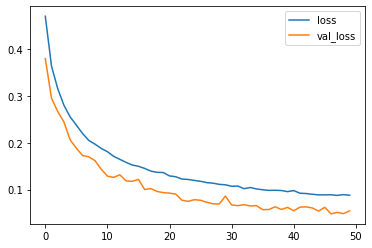

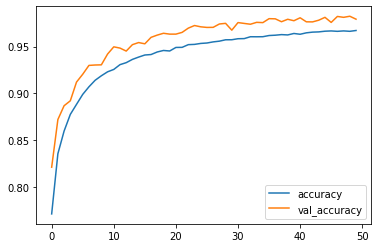

In [ ]:
test_loss, test_acc = model.evaluate(testing_data,  testing_labels, verbose=2)

metrics_df = pd.DataFrame(history.history)
metrics_df[["loss","val_loss"]].plot();
metrics_df[["accuracy","val_accuracy"]].plot();

In [ ]:
# Convert the model
converter = tf.lite.TFLiteConverter.from_saved_model(".") # path to the SavedModel directory
tflite_model = converter.convert()

# Save the model.
with open('pickupClassifier.tflite', 'wb') as f:
  f.write(tflite_model)